In [26]:
%load_ext watermark

In [1]:
from typing import Generator, List
from tqdm import tqdm
import numpy as np
import math

In [27]:
# Run this cell before close.
%watermark
%watermark --iversion
%watermark -b -r -g

2020-06-08T15:20:01+00:00

CPython 3.7.7
IPython 7.15.0

compiler   : GCC 8.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 16
interpreter: 64bit
numpy     1.18.5
cufflinks 0.17.3
pandas    1.0.4

Git hash: 12e0b4df45c897b9f5b19611ad0960eb1195be19
Git repo: https://github.com/ysraell/examples.git
Git branch: master


In [2]:
math.pi

3.141592653589793

In [3]:
N = 20000000

### From the book:

In [4]:
def calulate_pi(N: int) -> float:
    sign = 1
    pi = 0
    for d in range(1,2*N,2):
        pi += sign*4/d
        sign *= -1
        yield pi

### A Monte Carlo way.

You could approximate the $\pi$ number using the ration between the areas for a square ($A_\square$) and the concentric circle ($A_\circ$):
$$\frac{A_\circ}{A_\square} = \frac{\pi r^2}{(2r)^2} = \frac{\pi \not{r^2}~}{4\not{r^2}~} = \frac{\pi}{4} ~~~\therefore~~~\pi = 4\frac{A_\circ}{A_\square}$$
Using a Monte Carlo way, you could generate randomly numbers between $-1$ and $1$ (I suggest a uniform distribution) and count all points generated ($N$) as the total points inside the square ($N_\square$) centered in $\left (0,0 \right )$ and for the points inside the circle ($N_\circ$) only the points that satisfy the fallow statment:
$$x^2 + y^2 \leq 1 $$
Basicaly, you could approximate the ration between the areas using the ration between the total points inside:
$$\frac{A_\circ}{A_\square} \approx \frac{N_\circ}{N_\square}$$
In fact:
$$ \lim_{N \rightarrow \infty} \frac{N_\circ(N)}{N_\square(N)} \rightarrow \frac{A_\circ}{A_\square}$$
so as we have much points generated, more precise will be our extimate of $pi$:
$$ \lim_{N \rightarrow \infty} 4\frac{N_\circ(N)}{N_\square(N)} \rightarrow 4\frac{A_\circ}{A_\square} = \pi$$

Of course we have a raondom effect, but the convergence is guaranteed.


Obs.: you could use only the first quadrant, beacuse we have a simetry in both axis, you could use $(x,y) \in \left [0, 1 \right ]$.


Obs.2: the difference between using closed or open intervals is not significant (in our scale).

[Optimizing Jupyter Notebooks — A Comprehensive Guide, Muriz Serifovic in Towards Data Science](https://towardsdatascience.com/speed-up-jupyter-notebooks-20716cbe2025)

In [5]:
def calulate_pi2(N: int) -> float:
    N_in_circule = 0
    N_points = 0
    for x,y in np.random.uniform(0,1,(N,2)):
        N_points += 1
        N_in_circule += 1 if (x**2+y**2) <= 1 else 0
        yield 4*N_in_circule/N_points

In [6]:
calulated_pi_list = [pi for pi in tqdm(calulate_pi(N))]
calulated_pi_list2 = [pi for pi in tqdm(calulate_pi2(N))]

20000000it [00:11, 1760593.59it/s]
20000000it [00:43, 460730.54it/s]


In [7]:
def show_pi(tol: float, calulated_pis: List[float]):
    i = 0
    for pi in calulated_pis:
        i += 1
        err = abs(pi - math.pi)
        if err < tol:
            print('it = '+str(i)+', pi = '+str(pi)+' ('+str(err)+')')
            return
    print('Final it = '+str(i)+', pi = '+str(pi)+' ('+str(err)+')')

In [8]:
for i in range(9):
    show_pi(float("1e{}".format(-i)),calulated_pi_list)

it = 1, pi = 4.0 (0.8584073464102069)
it = 10, pi = 3.0418396189294032 (0.09975303466038987)
it = 100, pi = 3.1315929035585537 (0.00999975003123943)
it = 1000, pi = 3.140592653839794 (0.000999999749998981)
it = 10000, pi = 3.1414926535900345 (9.99999997586265e-05)
it = 100001, pi = 3.1416026534897203 (9.999899927226608e-06)
it = 1000001, pi = 3.1415936535887745 (9.999989813991306e-07)
it = 10000001, pi = 3.1415927535897814 (9.999998829002266e-08)
Final it = 20000000, pi = 3.141592603589817 (4.999997615939833e-08)


In [9]:
for i in range(13):
    show_pi(float("1e{}".format(-i)),calulated_pi_list2)

it = 1, pi = 4.0 (0.8584073464102069)
it = 10, pi = 3.2 (0.05840734641020706)
it = 14, pi = 3.142857142857143 (0.0012644892673496777)
it = 181825, pi = 3.142582153169256 (0.0009894995794628159)
it = 229240, pi = 3.1416855697086024 (9.291611880923867e-05)
it = 229276, pi = 3.1415935379193636 (8.843295704608067e-07)
it = 229276, pi = 3.1415935379193636 (8.843295704608067e-07)
it = 230231, pi = 3.1415925744143927 (7.917540045809801e-08)
it = 230245, pi = 3.141592651306217 (2.2835759949657586e-09)
Final it = 20000000, pi = 3.1416774 (8.474641020672635e-05)
Final it = 20000000, pi = 3.1416774 (8.474641020672635e-05)
Final it = 20000000, pi = 3.1416774 (8.474641020672635e-05)
Final it = 20000000, pi = 3.1416774 (8.474641020672635e-05)


In [17]:
import cufflinks as cf
import pandas as pd

In [18]:
pi_array = math.pi*np.ones(len(calulated_pi_list2))

In [19]:
First_its = 5000

In [20]:
cf.go_offline()
pi_df = pd.DataFrame(np.array([calulated_pi_list,calulated_pi_list2,pi_array.tolist()]).T[:First_its],columns=['Leibniz','Monte Carlo','pi'])

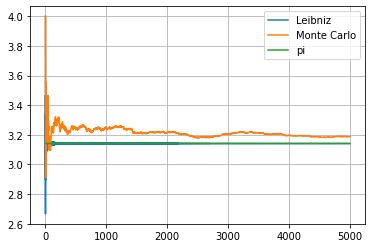

In [23]:
pi_df.plot(grid=True)

In [24]:
pi_df.describe()

,Leibniz,Monte Carlo,pi
count,5000.000000,5000.000000,5000.000000
mean,3.141707,3.214298,3.141593
std,0.016422,0.038335,0.000000
min,2.666667,2.909091,3.141593
25%,3.141193,3.192332,3.141593
50%,3.141593,3.211314,3.141593
75%,3.141993,3.226227,3.141593
max,4.000000,4.000000,3.141593
